In [2]:
import cv2
import time
import urllib2
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_frame(url):
    stream = urllib2.urlopen(url)
    bytes =""
    while True:
        bytes+=stream.read(1024)
        a = bytes.find('\xff\xd8')
        b = bytes.find('\xff\xd9')
        if a!=-1 and b!=-1:
            jpg = bytes[a:b+2]
            bytes= bytes[b+2:]
            img_arr = np.asarray(bytearray(jpg), dtype=np.uint8)
            return img_arr

frame = cv2.imdecode(get_frame('http://166.155.71.82:8080/mjpg/video.mjpg?COUNTER'), 1)
print("Frame shape: {}".format(frame.shape))

Frame shape: (720, 1280, 3)


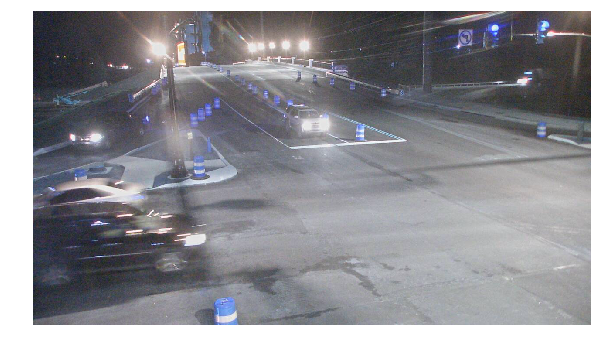

In [ ]:
fig = plt.figure(figsize=(10,7))
im1 = plt.imshow(np.zeros_like(frame))
plt.axis('off')
while True:
    start = time.time()
    img_arr = get_frame('http://138.26.105.144:80/mjpg/video.mjpg?COUNTER')
    if len(img_arr) !=0 :
        frame = cv2.imdecode(img_arr, 1)
        im1.set_data(frame)
        fig.canvas.draw()
        display.display(fig)
        display.clear_output(wait=True)